<a href="https://colab.research.google.com/github/khoatran02/Speech_Emotion_Recognition_Using_LTSM.ipynb/blob/main/Speech_Emotion_Recognition_Using_LTSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Load data from Kaggle

In [4]:
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess")
#  link dataset
#{"username":"trnhonganhkhoa","key":"e60cbed63c7999af3a91e18c4e851878"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: trnhonganhkhoa
Your Kaggle Key: ··········


100%|██████████| 428M/428M [00:02<00:00, 192MB/s]


#Import libary

In [5]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [6]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label =filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())

len(labels)

2800

In [7]:
paths[:5]

['/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_disgust/OAF_date_disgust.wav',
 '/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_disgust/OAF_hush_disgust.wav',
 '/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_disgust/OAF_reach_disgust.wav',
 '/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_disgust/OAF_sell_disgust.wav',
 '/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_disgust/OAF_bar_disgust.wav']

# Create a dataframe

In [8]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df

,speech,label
0,/content/toronto-emotional-speech-set-tess/TES...,disgust
1,/content/toronto-emotional-speech-set-tess/TES...,disgust
2,/content/toronto-emotional-speech-set-tess/TES...,disgust
3,/content/toronto-emotional-speech-set-tess/TES...,disgust
4,/content/toronto-emotional-speech-set-tess/TES...,disgust
...,...,...
2795,/content/toronto-emotional-speech-set-tess/TES...,fear
2796,/content/toronto-emotional-speech-set-tess/TES...,fear
2797,/content/toronto-emotional-speech-set-tess/TES...,fear
2798,/content/toronto-emotional-speech-set-tess/TES...,fear


In [9]:
df['label'].value_counts()

disgust    400
ps         400
angry      400
happy      400
neutral    400
sad        400
fear       400
Name: label, dtype: int64

# Exploratory Data Anlysis and Visualization data

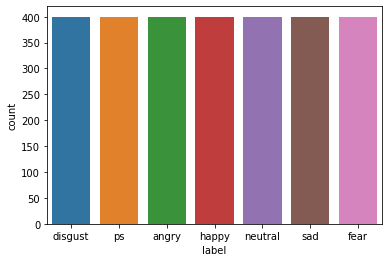

In [10]:
sns.countplot(df['label'])

In [11]:
def waveplot(data, sr, emotion): # Show wave diagram data and Audio data
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion): # Show Spectogram 
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

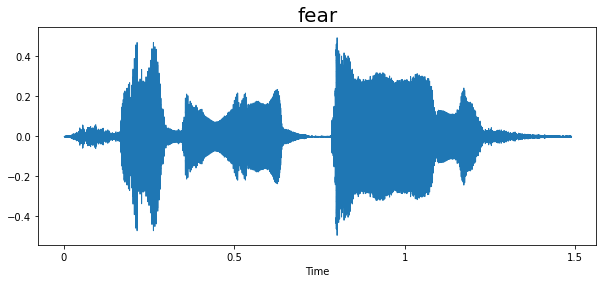

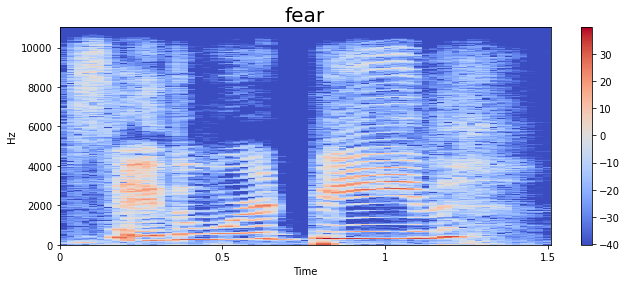

In [12]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

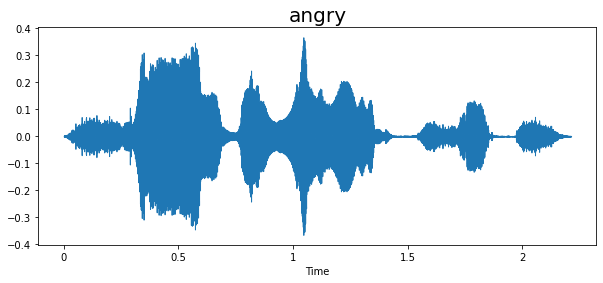

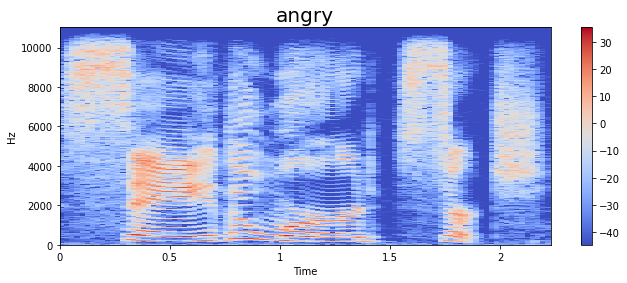

In [13]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

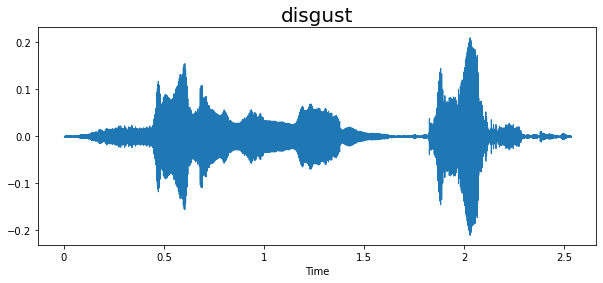

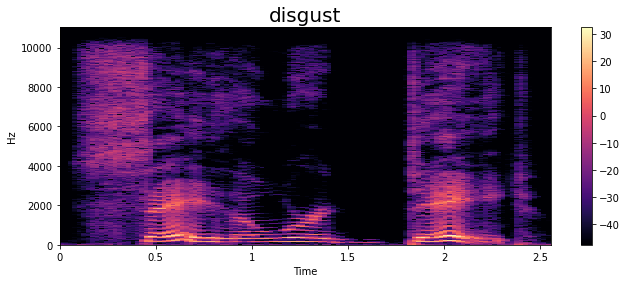

In [14]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

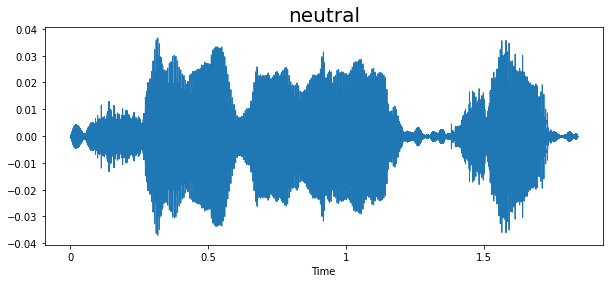

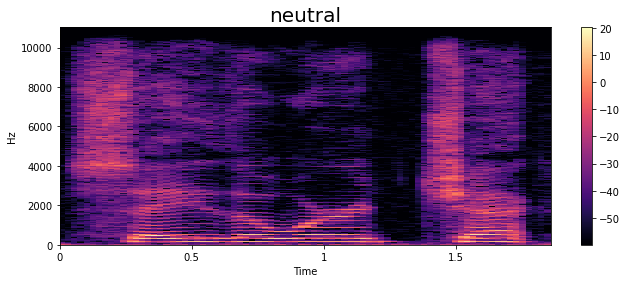

In [15]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

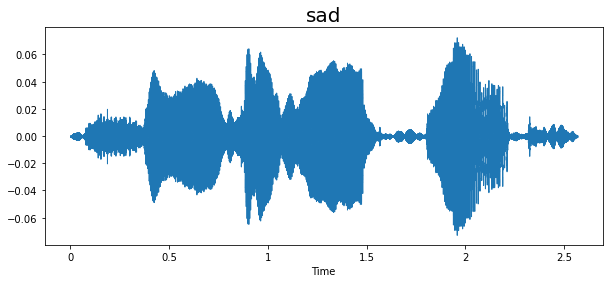

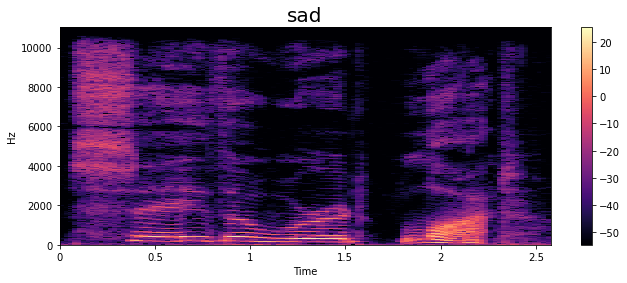

In [16]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

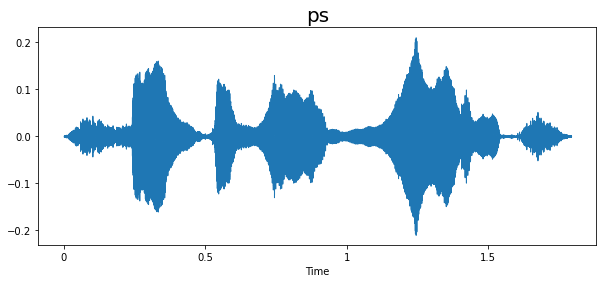

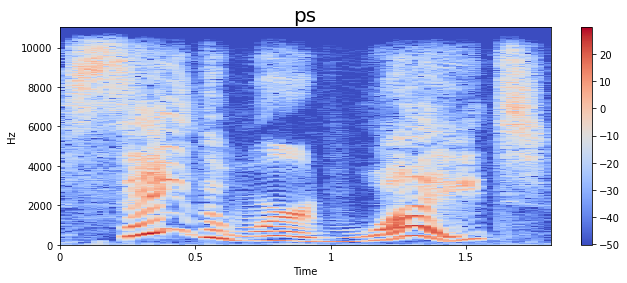

In [17]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

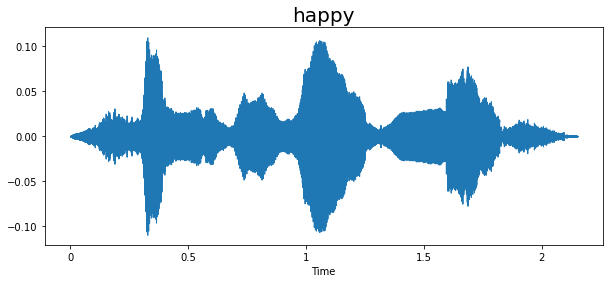

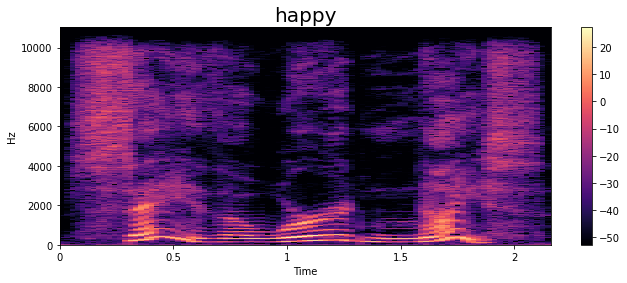

In [18]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[300]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Feature Extraction

##With MFCC

In [19]:
def extract_mfcc(filename): # Processing speech data, convert from raw data to MFCC data 
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [20]:
extract_mfcc(df['speech'][0])

array([-4.59039276e+02,  9.07258987e+01,  1.49566402e+01,  1.71539803e+01,
        2.33183308e+01, -2.74650097e+00, -1.08012600e+01,  6.04273558e+00,
       -1.79971600e+01, -2.59179449e+00, -1.17554016e+01, -1.51237559e+00,
       -4.83802605e+00,  1.65325725e+00, -2.44642806e+00,  3.26697612e+00,
       -4.73854589e+00,  3.89850211e+00, -3.75892568e+00, -1.39801228e+00,
       -1.28123045e+00,  2.06604432e-02, -3.30962276e+00, -1.20911741e+00,
       -5.80662251e+00,  1.84415889e+00, -3.87822580e+00,  2.36263275e+00,
       -4.93158132e-01,  8.43181431e-01, -5.16866624e-01,  1.19468200e+00,
        3.98248076e-01,  3.68297291e+00,  7.28697681e+00,  1.14281006e+01,
        1.28877535e+01,  1.19062710e+01,  1.28244438e+01,  8.97031307e+00],
      dtype=float32)

In [21]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [22]:
X_mfcc

0       [-459.03928, 90.7259, 14.95664, 17.15398, 23.3...
1       [-457.2537, 107.73507, -1.6079384, -3.1391554,...
2       [-514.4826, 74.525, 15.585366, 12.779371, 22.6...
3       [-442.2162, 96.57303, 15.6435795, -6.42295, -2...
4       [-472.4474, 120.60709, 19.300816, -15.411111, ...
                              ...                        
2795    [-483.15994, 98.6399, 20.650229, -22.495348, -...
2796    [-443.76065, 87.93629, 3.6388679, -29.808708, ...
2797    [-434.18063, 86.79906, 8.796568, -16.086384, -...
2798    [-457.08997, 55.464764, 7.61458, -7.6913505, 4...
2799    [-460.5523, 85.030754, 2.3507674, -13.716526, ...
Name: speech, Length: 2800, dtype: object

In [23]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [24]:
# ## input split
# X = np.expand_dims(X, -1)
# X.shape

In [25]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder()
# y = enc.fit_transform(df[['label']])

In [26]:
y = df[['label']]

In [27]:
# y = y.toarray()
# y.shape

In [28]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [29]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
scaler=StandardScaler()
X = scaler.fit_transform(X)
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2240, 40), (560, 40), (2240, 7), (560, 7))

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.1, shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((2016, 40), (560, 40), (224, 40), (2016, 7), (560, 7), (224, 7))

In [32]:
# from sklearn.preprocessing import LabelEncoder,StandardScaler

# scaler=StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)
# X_val=scaler.transform(X_val)
# X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

#Training with LSTM model

##Create LSTM model 

In [33]:
from keras.engine import input_spec
from typing import Sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

modelLSTM = Sequential([
    LSTM(256, return_sequences=True, input_shape=(40,1)),
    LSTM(256),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='sigmoid'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])


In [34]:
modelLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
modelLSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 256)           264192    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [36]:
historyLSTM = modelLSTM.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=16, verbose = 1)

Epoch 1/150
126/126 [==============================] - 10s 15ms/step - loss: 0.4082 - accuracy: 0.3562 - val_loss: 0.3040 - val_accuracy: 0.5848
Epoch 2/150
126/126 [==============================] - 1s 8ms/step - loss: 0.2722 - accuracy: 0.6989 - val_loss: 0.2042 - val_accuracy: 0.8304
Epoch 3/150
126/126 [==============================] - 1s 8ms/step - loss: 0.2165 - accuracy: 0.8105 - val_loss: 0.1611 - val_accuracy: 0.8750
Epoch 4/150
126/126 [==============================] - 1s 8ms/step - loss: 0.1743 - accuracy: 0.8591 - val_loss: 0.1323 - val_accuracy: 0.9062
Epoch 5/150
126/126 [==============================] - 1s 8ms/step - loss: 0.1543 - accuracy: 0.8800 - val_loss: 0.1313 - val_accuracy: 0.8929
Epoch 6/150
126/126 [==============================] - 1s 8ms/step - loss: 0.1255 - accuracy: 0.9082 - val_loss: 0.0834 - val_accuracy: 0.9375
Epoch 7/150
126/126 [==============================] - 1s 9ms/step - loss: 0.1066 - accuracy: 0.9221 - val_loss: 0.0700 - val_accuracy: 0.95

##Plot result

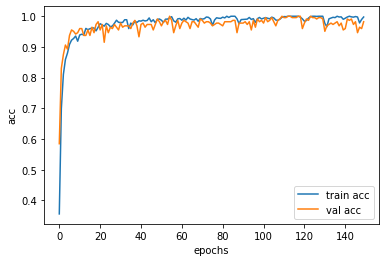

In [37]:
epochs = list(range(150))
acc = historyLSTM.history['accuracy']
val_acc = historyLSTM.history['val_accuracy']

plt.plot(epochs, acc, label='train acc')
plt.plot(epochs, val_acc, label='val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

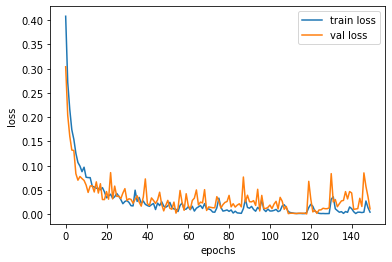

In [38]:
epochs = list(range(150))
loss = historyLSTM.history['loss']
val_loss = historyLSTM.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [40]:
model_acc_train = modelLSTM.evaluate(X_train, y_train, verbose=1)[1]
print("Train Accuracy: {:.3f}%".format(model_acc_train * 100))

63/63 [==============================] - 1s 6ms/step - loss: 0.0014 - accuracy: 0.9990
Train Accuracy: 99.901%


In [41]:
model_acc_test = modelLSTM.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc_test * 100))

Test Accuracy: 98.214%


In [42]:
modelLSTM.save("/content/drive/MyDrive/Colab Notebooks/emotion_recognition_by_signal_method/Process_Data_Speech")

In [2]:
from tensorflow import keras
modelLSTM_load = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/emotion_recognition_by_signal_method/Process_Data_Speech')

In [34]:
model_acc_test = modelLSTM_load.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc_test * 100))

Test Accuracy: 98.393%


##Test with new data

In [35]:
import IPython.display as ipd

def print_plot_play(x, Fs, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player
    
    Notebook: C1/B_PythonAudio.ipynb
    
    Args: 
        x: Input signal
        Fs: Sampling rate of x    
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))

MP3 file:  Fs = 48000, x.shape = (89088,), x.dtype = float32


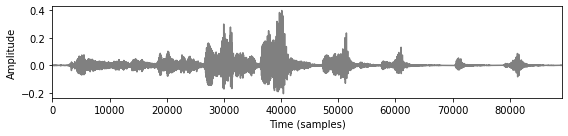

In [37]:
# Read mp3
fn_mp3 = os.path.join('..', 'data', 'B', '/content/drive/MyDrive/Colab Notebooks/emotion_recognition_by_signal_method/Process_Data_Speech/Tieng-chang-trai-cuoi-ngan-www_tiengdong_com.mp3')
x, Fs = librosa.load(fn_mp3, sr=None)
print_plot_play(x=x, Fs=Fs, text='MP3 file: ')

In [39]:
X_new = X_test[10]
Y_new = y_test[10]

X_new = np.expand_dims(X_new, axis=0)

y_predict = modelLSTM_load.predict(X_new)
print("Gia tri du doan: ", y_predict)
print("Gia tri dung: ", Y_new)

Gia tri du doan:  [[1.6529086e-08 5.6132254e-09 1.0000000e+00 8.3762774e-09 4.9993354e-10
  1.0725930e-09 1.5378895e-10]]
Gia tri dung:  [0. 0. 1. 0. 0. 0. 0.]


#Training with CNN1D model

##Create CNN1D model

In [ ]:
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
modelCNN=tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
modelCNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 512)           3072      
                                                                 
 batch_normalization (BatchN  (None, 40, 512)          2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 512)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 512)           1311232   
                                                                 
 batch_normalization_1 (Batc  (None, 20, 512)          2048      
 hNormalization)                                                 
                                                        

In [ ]:
history = modelCNN.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=40, batch_size=32)

Epoch 1/40
63/63 [==============================] - 1s 9ms/step - loss: 0.5448 - accuracy: 0.8671 - val_loss: 0.6783 - val_accuracy: 0.7893
Epoch 2/40
63/63 [==============================] - 1s 9ms/step - loss: 0.1316 - accuracy: 0.9623 - val_loss: 0.0930 - val_accuracy: 0.9786
Epoch 3/40
63/63 [==============================] - 1s 9ms/step - loss: 0.0859 - accuracy: 0.9757 - val_loss: 1.0869 - val_accuracy: 0.7000
Epoch 4/40
63/63 [==============================] - 1s 9ms/step - loss: 0.0885 - accuracy: 0.9727 - val_loss: 10.2538 - val_accuracy: 0.0179
Epoch 5/40
63/63 [==============================] - 1s 9ms/step - loss: 0.0737 - accuracy: 0.9777 - val_loss: 19.4948 - val_accuracy: 0.0000e+00
Epoch 6/40
63/63 [==============================] - 1s 9ms/step - loss: 0.0499 - accuracy: 0.9841 - val_loss: 41.0377 - val_accuracy: 0.0000e+00
Epoch 7/40
63/63 [==============================] - 1s 9ms/step - loss: 0.0431 - accuracy: 0.9871 - val_loss: 49.9688 - val_accuracy: 0.2250
Epoch 8/

## Plot results

In [ ]:
model_acc = model.evaluate(X, y, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

NameError: ignored

In [ ]:
epochs = list(range(40))
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, label='train acc')
plt.plot(epochs, val_acc, label='val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()